# Duração da carreira dos jogadores de basquete

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statics as sts

In [2]:
base = pd.read_csv('nba-players.csv')
base.shape

(1340, 22)

In [3]:
base.head()

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
display(base.info())
base = base.dropna()
display(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

None

In [5]:
base.isnull().sum().sum()

0

In [6]:
base.describe()

,Unnamed: 0,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,...,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,386.968991,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,...,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,0.000000,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,334.750000,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,...,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,669.500000,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,...,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,1004.250000,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,...,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,1339.000000,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,...,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
TARGET = 'target_5yrs'

In [8]:
#base = base.groupby(['name'])['gp'].mean()
#base

# gp

<AxesSubplot:xlabel='gp', ylabel='Count'>

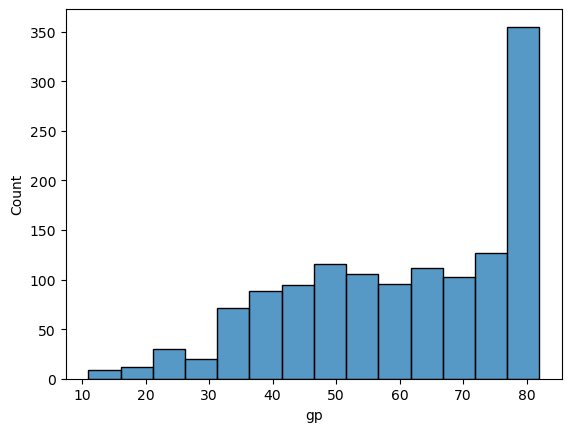

In [9]:
sns.histplot(base['gp'])

<AxesSubplot:xlabel='target_5yrs', ylabel='gp'>

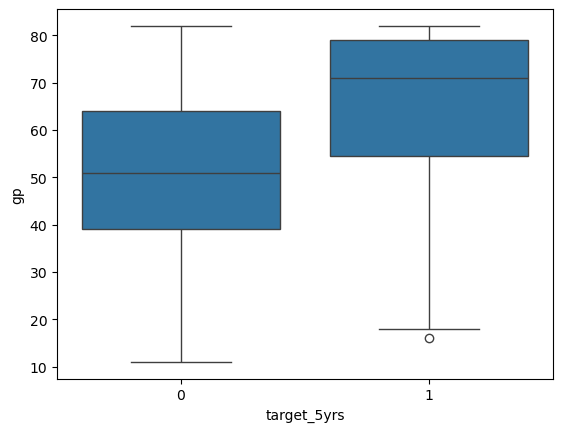

In [10]:
sns.boxplot(x=base[TARGET],y=base["gp"])

Os jogadores que jogaram muitos jogos ainda estarão ativos em cinco anos

# min

<AxesSubplot:xlabel='min', ylabel='Count'>

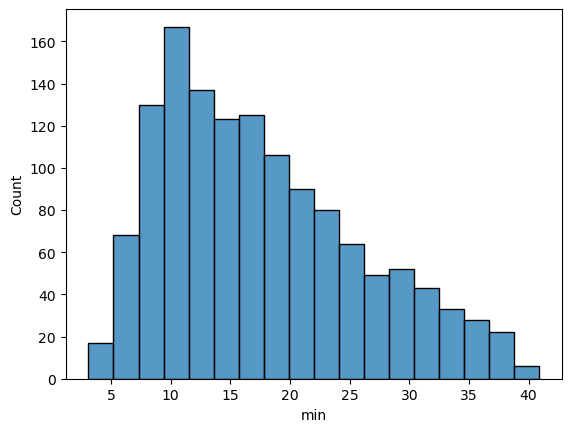

In [11]:
sns.histplot(base['min'])

<AxesSubplot:xlabel='target_5yrs', ylabel='min'>

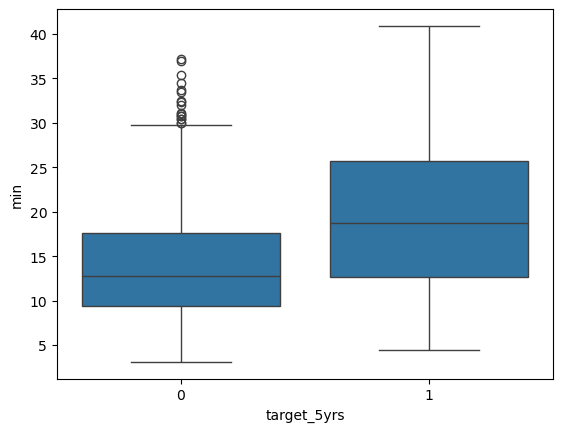

In [12]:
sns.boxplot(x=base[TARGET], y=base['min'])

Multiplique isso pelo número de jogos disputados para obter o tempo total jogado

<AxesSubplot:xlabel='total_time', ylabel='Count'>

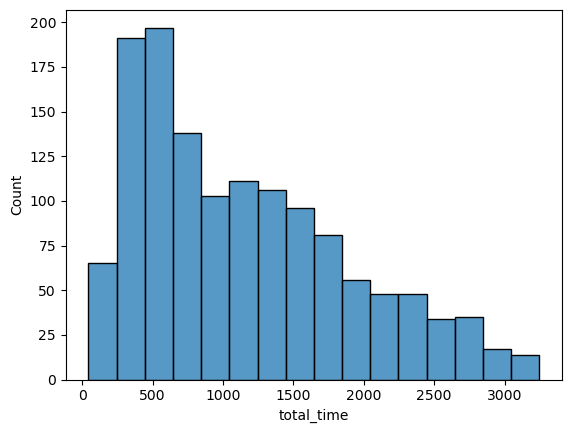

In [13]:
base['total_time'] = base['min'] * base['gp']
sns.histplot(base['total_time'])

<AxesSubplot:xlabel='target_5yrs', ylabel='total_time'>

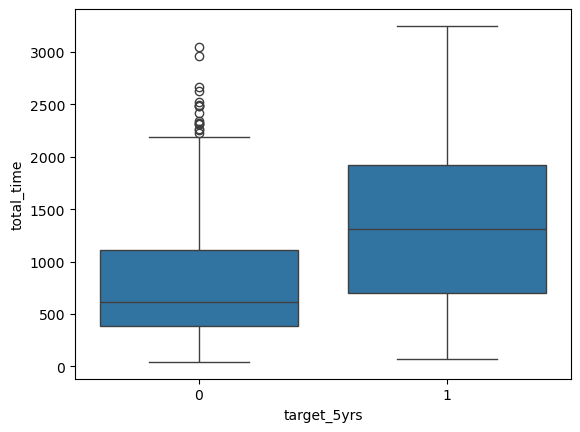

In [15]:
sns.boxplot(x=base[TARGET], y=base['total_time'])

# pts

<AxesSubplot:xlabel='pts', ylabel='Count'>

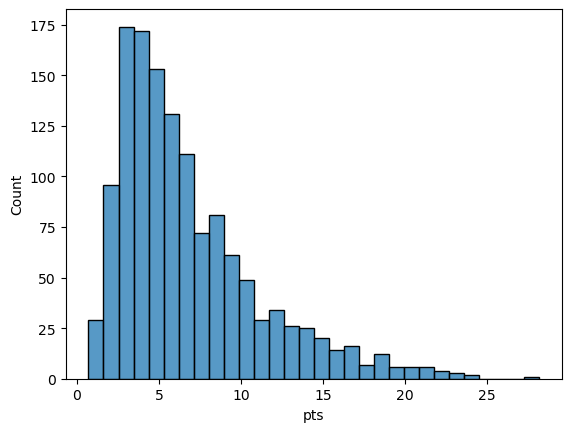

In [16]:
sns.histplot(base['pts'])

O mesmo tempo de jogo, quanto maior a pontuação, melhor...?

<AxesSubplot:xlabel='pts', ylabel='total_time'>

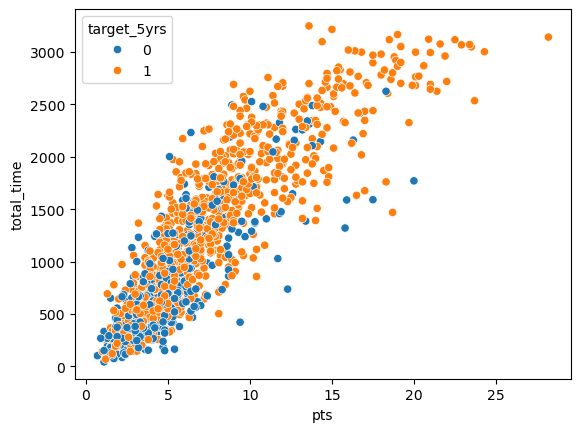

In [17]:
sns.scatterplot(x=base['pts'], y=base['total_time'], hue=base[TARGET])

<AxesSubplot:xlabel='target_5yrs', ylabel='pts/total_time'>

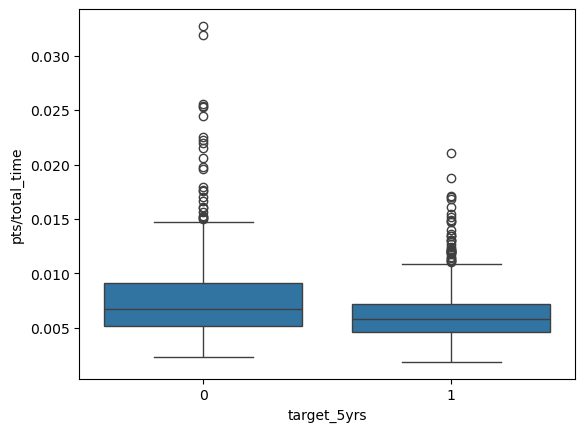

In [18]:
base['pts/total_time'] = base['pts']/base['total_time']
sns.boxplot(x=base[TARGET], y=base['pts/total_time'])

O resultado foi o oposto do que eu esperava.

Existem áreas que não são valorizadas em termos de pontos?

<AxesSubplot:xlabel='target_5yrs', ylabel='pts'>

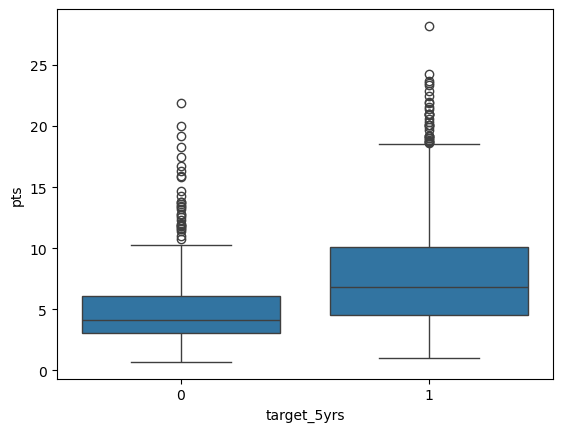

In [19]:
sns.boxplot(x=base[TARGET], y=base['pts'])

# fgm fga fg

<AxesSubplot:xlabel='fgm', ylabel='Count'>

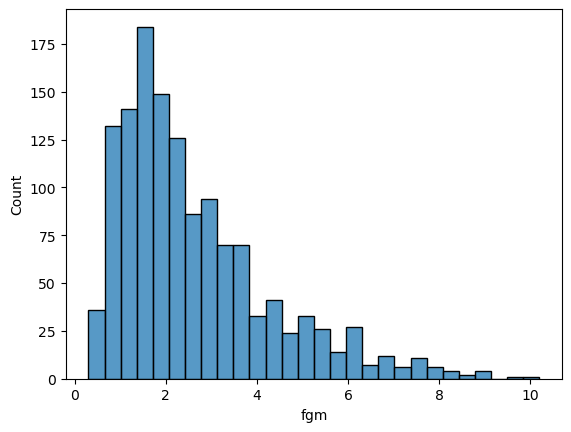

In [20]:
sns.histplot(base['fgm'])

<AxesSubplot:xlabel='fga', ylabel='Count'>

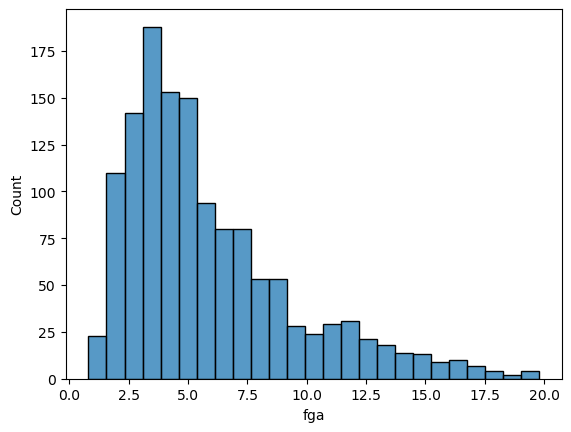

In [21]:
sns.histplot(base['fga'])

<AxesSubplot:xlabel='fg', ylabel='Count'>

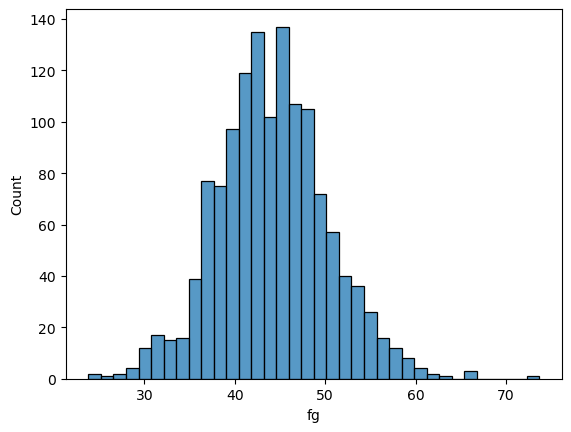

In [22]:
sns.histplot(base['fg'])

<AxesSubplot:xlabel='target_5yrs', ylabel='fg'>

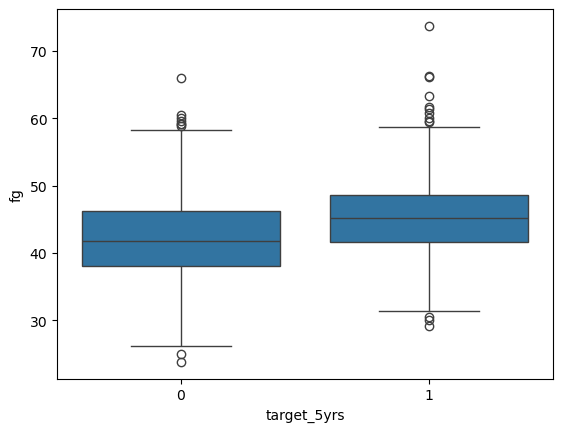

In [24]:
sns.boxplot(x=base[TARGET], y=base['fg'])

O número é proporcional ao tempo gasto no concurso, então vou omitir.

# 3p_made 3pa 3p

<AxesSubplot:xlabel='3p_made', ylabel='Count'>

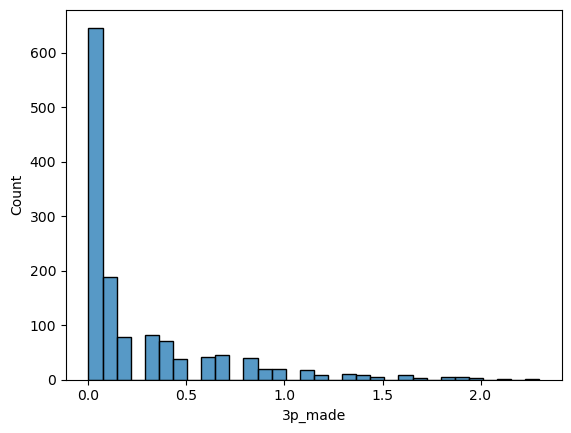

In [25]:
sns.histplot(base['3p_made'])

<AxesSubplot:xlabel='target_5yrs', ylabel='3p_made'>

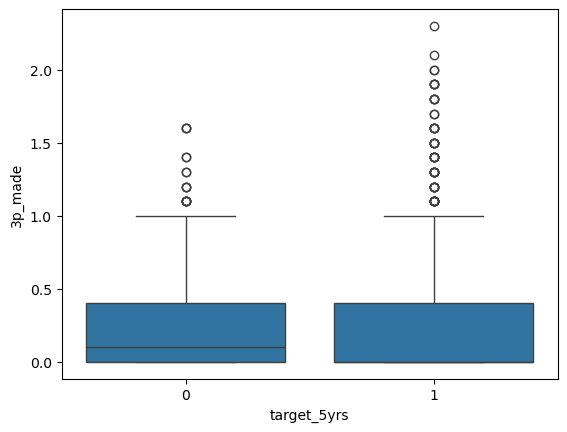

In [26]:
sns.boxplot(x=base[TARGET], y=base['3p_made'])

<AxesSubplot:xlabel='3pa', ylabel='Count'>

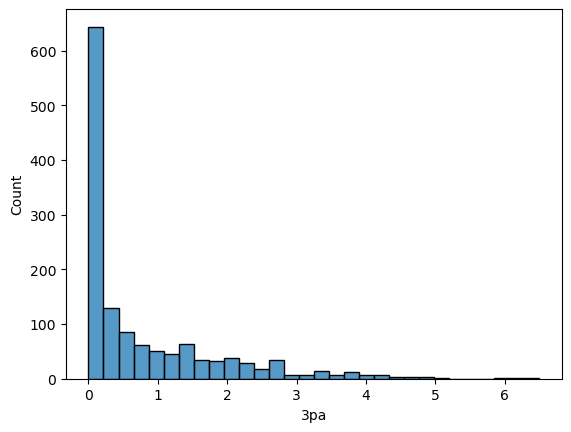

In [27]:
sns.histplot(base['3pa'])

<AxesSubplot:xlabel='target_5yrs', ylabel='3pa'>

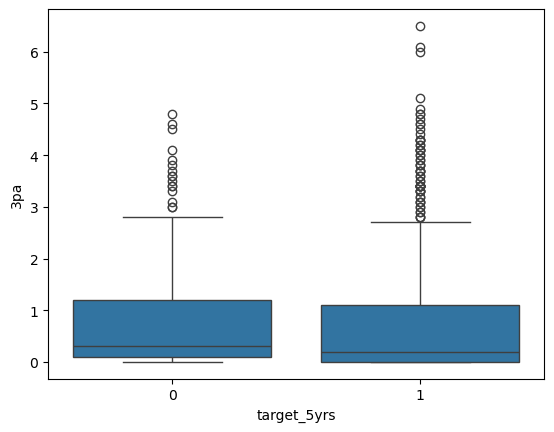

In [28]:
sns.boxplot(x=base[TARGET], y=base['3pa'])

<AxesSubplot:xlabel='3p', ylabel='Count'>

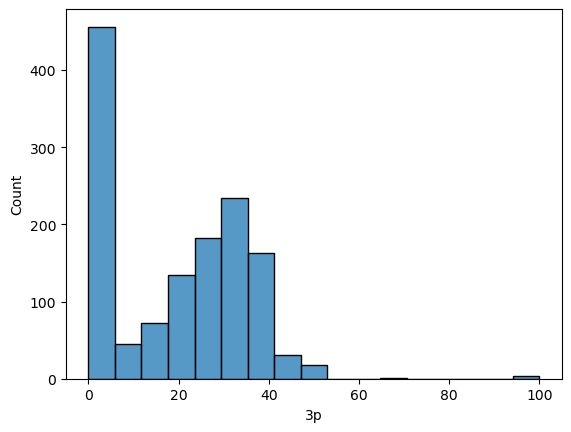

In [29]:
sns.histplot(base['3p'])

<AxesSubplot:xlabel='target_5yrs', ylabel='3p'>

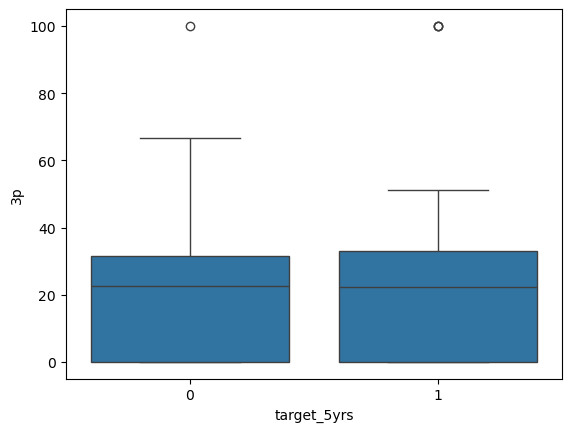

In [30]:
sns.boxplot(x=base[TARGET], y=base['3p'])

Quanto ao 3p, não parece estar relacionado ao TARGET?

Nenhuma diferença significativa, já que todos os jogadores são tão poucos.

# ftm fta ft

<AxesSubplot:xlabel='ftm', ylabel='Count'>

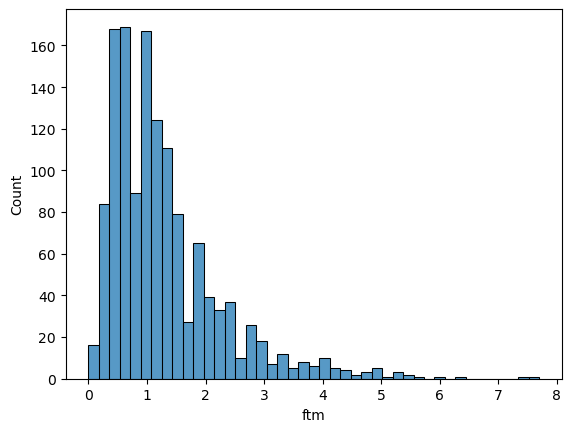

In [32]:
sns.histplot(base['ftm'])

<AxesSubplot:xlabel='fta', ylabel='Count'>

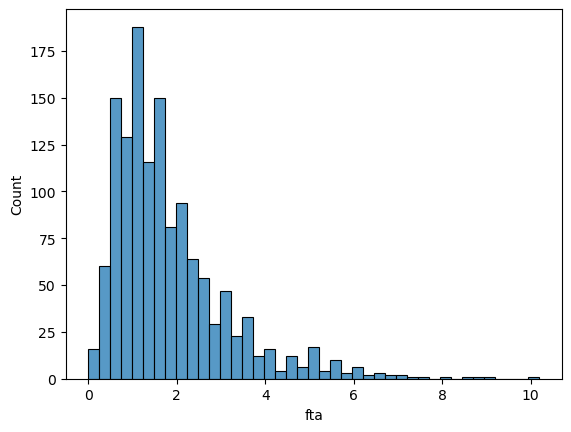

In [33]:
sns.histplot(base['fta'])

<AxesSubplot:xlabel='ft', ylabel='Count'>

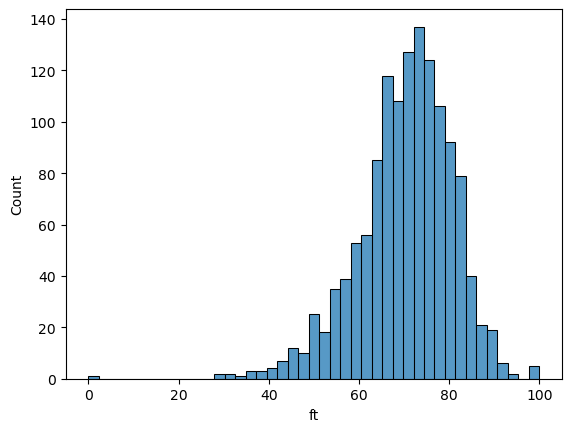

In [34]:
sns.histplot(base['ft'])

<AxesSubplot:xlabel='target_5yrs', ylabel='ft'>

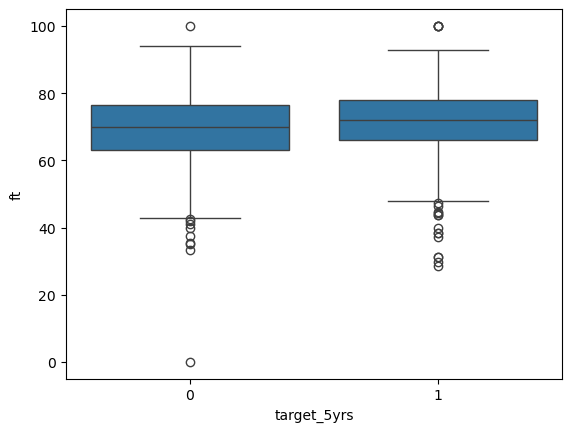

In [35]:
sns.boxplot(x=base[TARGET], y=base['ft'])

O número é proporcional ao tempo gasto no concurso, então vou omitir

# oreb dreb reb

<AxesSubplot:xlabel='oreb', ylabel='Count'>

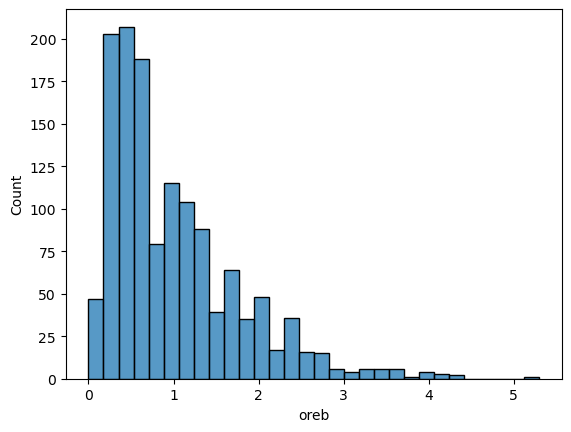

In [36]:
sns.histplot(base['oreb'])

<AxesSubplot:xlabel='target_5yrs', ylabel='oreb'>

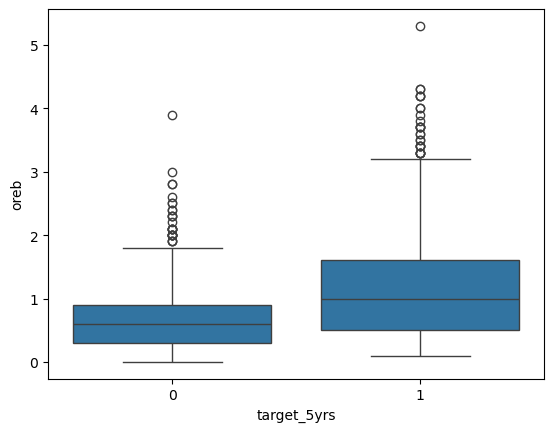

In [37]:
sns.boxplot(x=base[TARGET], y=base['oreb'])

<AxesSubplot:xlabel='dreb', ylabel='Count'>

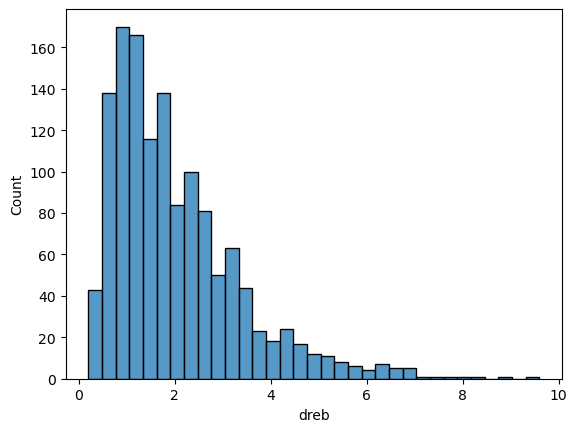

In [38]:
sns.histplot(base['dreb'])

<AxesSubplot:xlabel='target_5yrs', ylabel='dreb'>

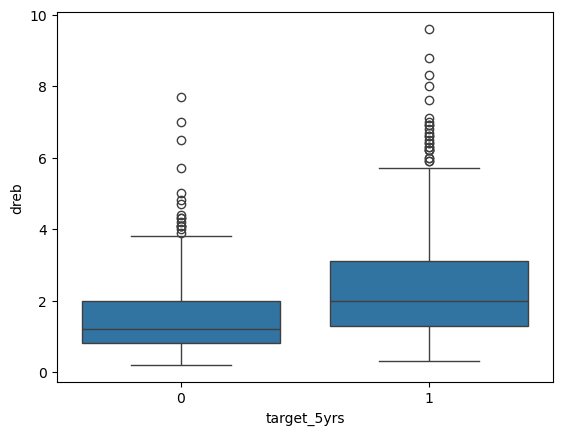

In [40]:
sns.boxplot(x=base[TARGET], y=base['dreb'])

Existe uma diferença entre oreb e dreb?

<AxesSubplot:xlabel='oreb/dreb', ylabel='Count'>

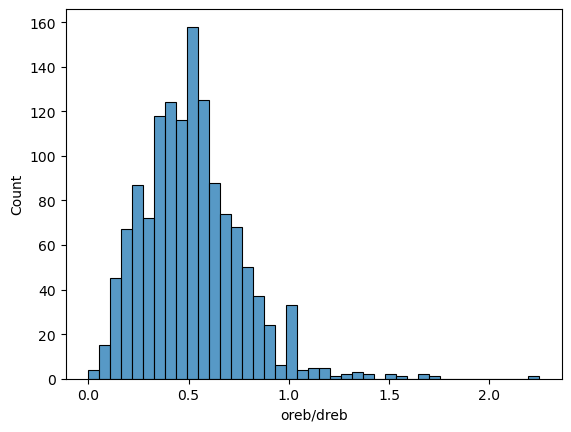

In [41]:
base['oreb/dreb'] = base['oreb']/base['dreb']
sns.histplot(base['oreb/dreb'])

<AxesSubplot:xlabel='target_5yrs', ylabel='oreb/dreb'>

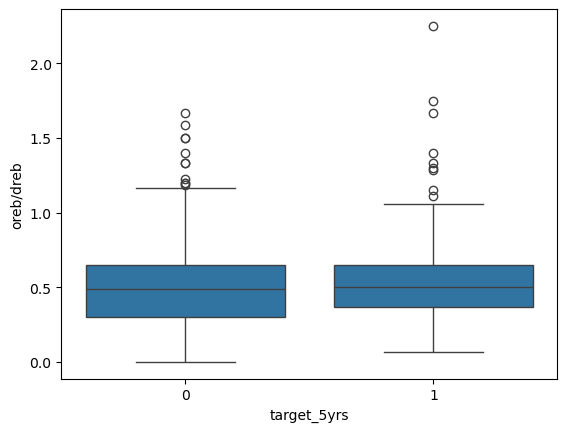

In [42]:
sns.boxplot(x=base[TARGET], y=base['oreb/dreb'])

<AxesSubplot:xlabel='reb', ylabel='Count'>

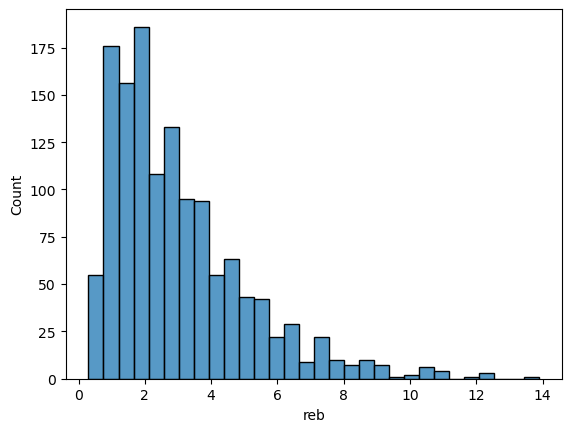

In [44]:
sns.histplot(base['reb'])

<AxesSubplot:xlabel='target_5yrs', ylabel='reb'>

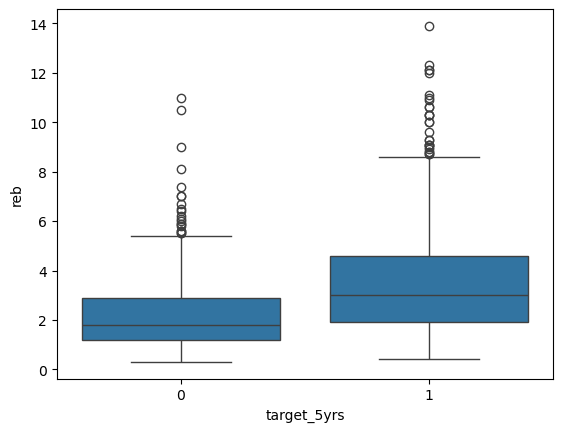

In [45]:
sns.boxplot(x=base[TARGET], y=base['reb'])

# ast

<AxesSubplot:xlabel='ast', ylabel='Count'>

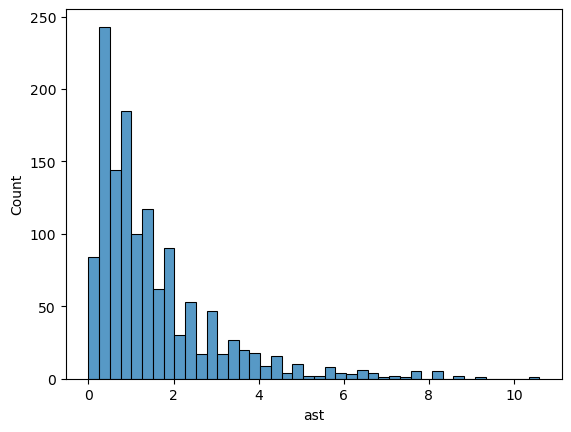

In [47]:
sns.histplot(base['ast'])

<AxesSubplot:xlabel='target_5yrs', ylabel='ast'>

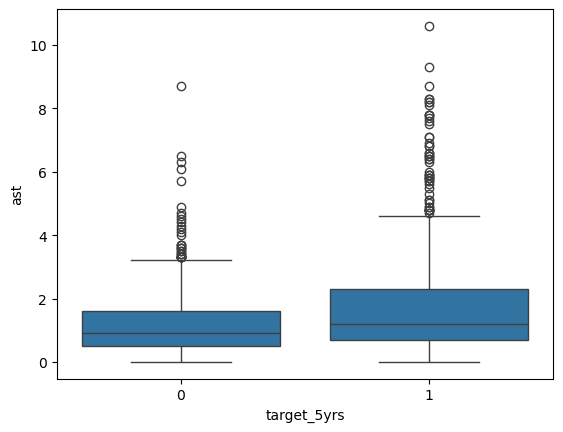

In [48]:
sns.boxplot(x=base[TARGET], y=base['ast'])

# stl

<AxesSubplot:xlabel='stl', ylabel='Count'>

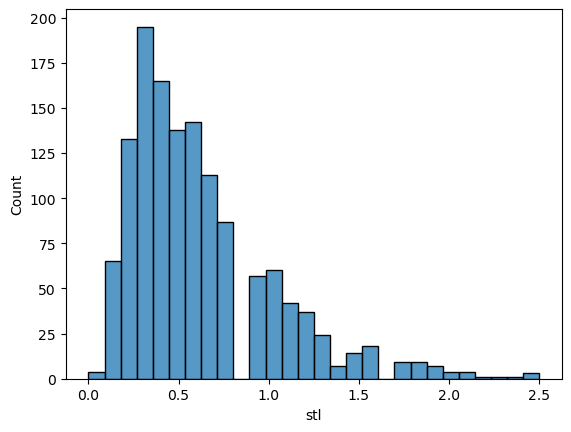

In [49]:
sns.histplot(base['stl'])

<AxesSubplot:xlabel='target_5yrs', ylabel='stl'>

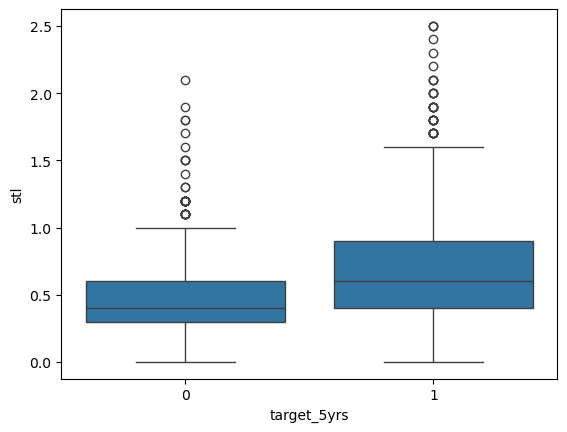

In [50]:
sns.boxplot(x=base[TARGET], y=base['stl'])

# blk

<AxesSubplot:xlabel='blk', ylabel='Count'>

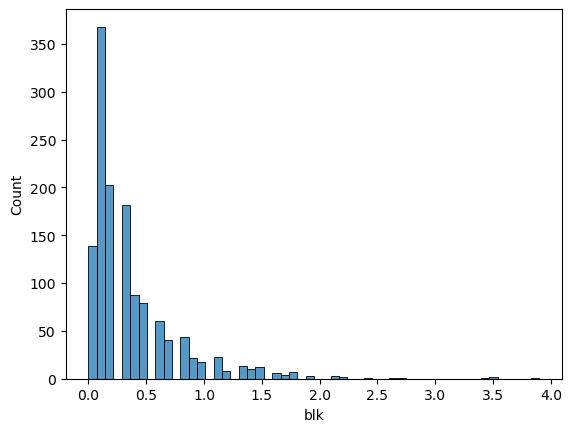

In [51]:
sns.histplot(base['blk'])

<AxesSubplot:xlabel='target_5yrs', ylabel='blk'>

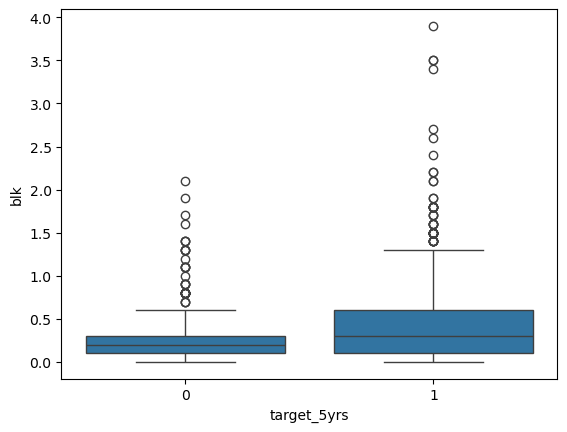

In [52]:
sns.boxplot(x=base[TARGET], y=base['blk'])

# tov

<AxesSubplot:xlabel='tov', ylabel='Count'>

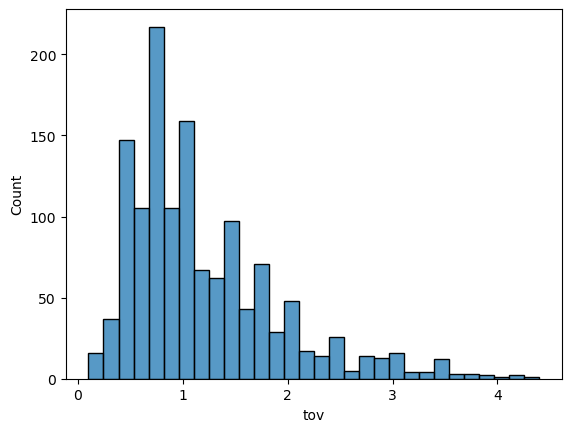

In [53]:
sns.histplot(base['tov'])

<AxesSubplot:xlabel='target_5yrs', ylabel='tov'>

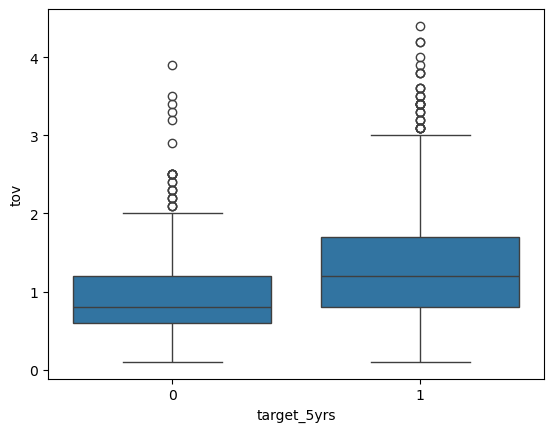

In [54]:
sns.boxplot(x=base[TARGET], y=base['tov'])

<AxesSubplot:>

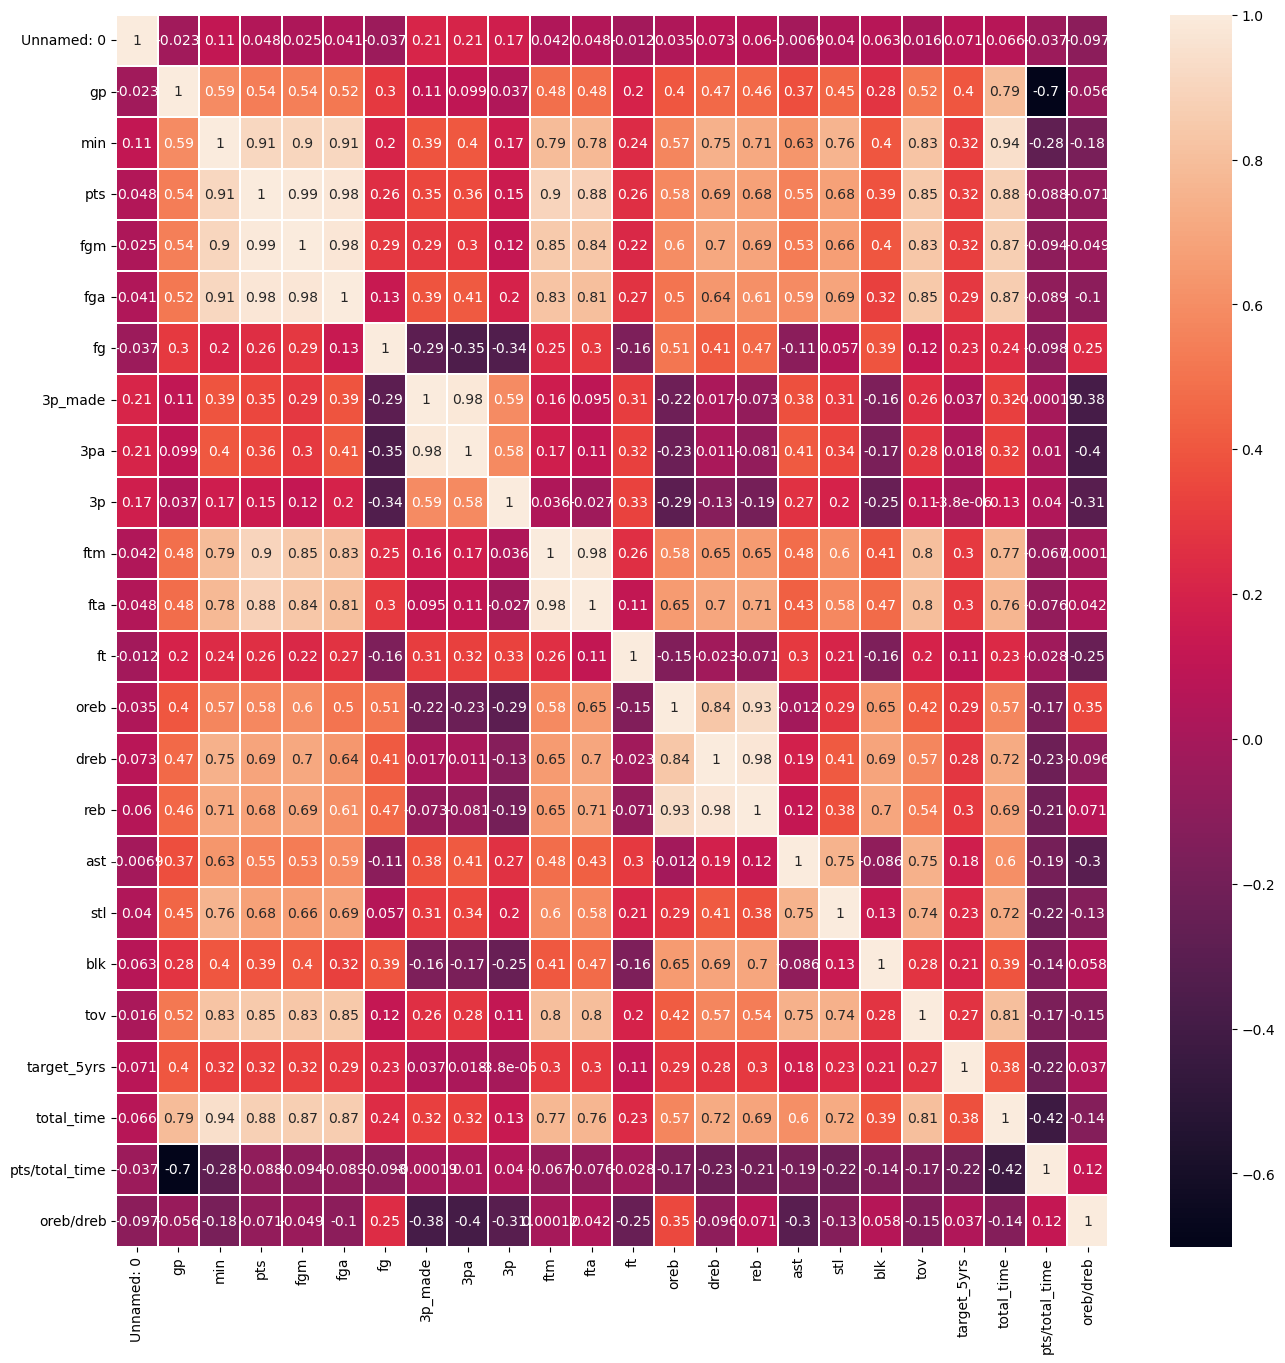

In [55]:
plt.figure(figsize=(16, 16))
sns.heatmap(base.drop('name', axis=1).corr(), annot=True, linewidths=.2)